# Code Assignment Mod6L14 — Confusion Matrix & Metrics on Restaurant Inspections

**Format:** Instructor Guidance → Your Task → We Share (Reflection)

**Goal:** Using the same **classification workflow** and models as last time, build confusion matrices and calculate accuracy, precision, and recall of each model.  


## Instructor Guidance (Pseudocode + Docs)

Use this as a roadmap; students implement below.

**Docs (quick links):**
- Train/Test Split — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- Logistic Regression — scikit-learn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
- Confusion Matrix / Classification Report — scikit-learn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics  
- `pandas.get_dummies` (one-hot) — https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

### Guidance (same models as last challenge -- FEEL free to copy and paste the code that you need from the last code assignment)

1) **Load CSV** → preview shape & columns.  
2) **Define target (y)** as a **binary** label: e.g., `CRITICAL FLAG == "Critical"` → 1, else 0 *(positive class = “Critical”)*.  
3) **Pick features (X)**: start small (`SCORE`), then add categorical dummies (`BORO`, `CUISINE DESCRIPTION`), keep it simple.  
4) **Minimal prep**: coerce **only used columns** to numeric (for numeric features); `get_dummies` for categoricals (`drop_first=True`). Drop NA rows on used cols.  
5) **Train–test split (80/20)** with fixed `random_state`.  
6) **Fit the same model** as last time (e.g., `LogisticRegression`), predict on **test**.  
7) **Evaluate**: confusion matrix, **accuracy**, **precision**, **recall**, **F1** (classification_report).  
8) **Repeat for 2 more models** (A (baseline)/B (single term)/C (more than one term)) on the **same split**; compare metrics.  
9) **Decide** which model is better for the business goal based on **precision vs recall** trade-offs.  


## Your Task

Work in pairs. Comment your choices briefly. Keep code simple and readable.

> **Reminder (last challenge model):** You trained **LogisticRegression**, on three models you will use those same 3 models!


### 1) Read the Restaurant Inspection CSV & Preview

In [ ]:

import pandas as pd



df = pd.read_csv('/Users/Marcy_Student/Downloads/DOHMH_New_York_City_Restaurant_Inspection_Results_20251104 copy.csv')
df.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50174196,THE GREATS OF CRAFT,Queens,47-20,CENTER BOULEVARD,11109.0,3479312023,NaN,01/01/1900,NaN,...,NaN,40.745641,-73.957137,402.0,26.0,100.0,4538318.0,4.000210e+09,QN31,POINT (-73.957136627525 40.745640668157)
1,50140563,CANTEEN @ CHELSEA PIERS FIELD HOUSE,Brooklyn,601,DEAN STREET,11238.0,6313880993,NaN,01/01/1900,NaN,...,NaN,40.680616,-73.969992,308.0,35.0,16300.0,3428601.0,3.000000e+09,BK64,POINT (-73.969992200023 40.68061568349)
2,50177123,70 7TH AVENUE SOUTH THEROS LLC,Queens,3009,35TH ST,11103.0,6468076482,NaN,01/01/1900,NaN,...,NaN,40.764778,-73.918674,401.0,22.0,6300.0,4009926.0,4.006500e+09,QN70,POINT (-73.918674354617 40.764778282908)
3,50001285,Y & B ENTERTAINMENT MANOR,Queens,3509,PRINCE STRRET,NaN,7188881778,Korean,06/24/2018,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
4,50172517,MAPLE CREAMERY,Brooklyn,653,STERLING PLACE,11216.0,7188095106,NaN,01/01/1900,NaN,...,NaN,40.673255,-73.956830,308.0,35.0,21900.0,3031390.0,3.012380e+09,BK61,POINT (-73.956830036833 40.673255481805)


### 2) Define the Binary Target (y)

We’ll predict whether an inspection had a **Critical violation**.

- Target rule: `CRITICAL FLAG == "Critical"` → **1**, else **0**.
- Positive class = **1 (Critical)** — keep this in mind for **precision/recall** meaning.


In [4]:
df['target'] = (df['CRITICAL FLAG'] == 'Critical').astype(int)
y = df['target']

### 3) Create Three Models (you can copy and paste the same modeling code from last code assignment here it is okay if your models have different features as long as you have 3 models)

- **Model A (minimal numeric):** `SCORE` only (lower is better in NYC scoring).  
- **Model B (add location):** `SCORE` + one-hot `BORO`.  
- **Model C (richer categories):** `SCORE` + one-hot `BORO` + top cuisines (one-hot of `CUISINE DESCRIPTION` limited to most frequent K).

> If any column is missing in your file, skip that spec or adjust accordingly.


In [5]:
X_A = df[['SCORE']]

X_B = pd.get_dummies(df[['SCORE','BORO']], drop_first=True)

top_cuisines = df['CUISINE DESCRIPTION'].value_counts().nlargest(5).index
df['CUISINE_TOP'] = df['CUISINE DESCRIPTION'].where(df['CUISINE DESCRIPTION'].isin(top_cuisines))
X_C = pd.get_dummies(df[['SCORE','BORO','CUISINE_TOP']], drop_first=True)

### 4) Minimal Cleaning: Drop NAs in Used Columns

Do this **per model** so each spec uses its own “clean” subset (same **target** slice).


In [6]:
X_A = X_A.join(y).dropna()
y_A = X_A.pop('target')

X_B = X_B.join(y).dropna()
y_B = X_B.pop('target')

X_C = X_C.join(y).dropna()
y_C = X_C.pop('target')


### 5) Train–Test Split (same split for all models)

Use **the same random_state** so models A/B/C are comparable.


In [15]:
from sklearn.model_selection import train_test_split

X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.2, random_state=42)
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.2, random_state=42)
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, test_size=0.2, random_state=42)

### 6) Fit the Same Models on the Train sets (Logistic Regression), Get Predictions, Print Confusion Matrices & Metric Reports

> **This is new**:  Be sure to look up documentation on `confusion_matrix` and `classification_report`.  Get a matrix and metrics report (accuracy, precision, recall, f1) for each model.


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model_name)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Critical','Critical']))
    print("\n")
    
    return model, y_pred

model_A, y_pred_A = evaluate_model(X_train_A, X_test_A, y_train_A, y_test_A, "Model A")
model_B, y_pred_B = evaluate_model(X_train_B, X_test_B, y_train_B, y_test_B, "Model B")
model_C, y_pred_C = evaluate_model(X_train_C, X_test_C, y_train_C, y_test_C, "Model C")


Model A
Confusion Matrix:
[[ 6082 18289]
 [ 3903 26714]]

Classification Report:
              precision    recall  f1-score   support

Non-Critical       0.61      0.25      0.35     24371
    Critical       0.59      0.87      0.71     30617

    accuracy                           0.60     54988
   macro avg       0.60      0.56      0.53     54988
weighted avg       0.60      0.60      0.55     54988



Model B
Confusion Matrix:
[[ 5713 18658]
 [ 3558 27059]]

Classification Report:
              precision    recall  f1-score   support

Non-Critical       0.62      0.23      0.34     24371
    Critical       0.59      0.88      0.71     30617

    accuracy                           0.60     54988
   macro avg       0.60      0.56      0.52     54988
weighted avg       0.60      0.60      0.55     54988



Model C
Confusion Matrix:
[[ 5993 18378]
 [ 3795 26822]]

Classification Report:
              precision    recall  f1-score   support

Non-Critical       0.61      0.25      0.35 

### 7) Visualize One Confusion Matrix 

Be able to interpret this Matrix 

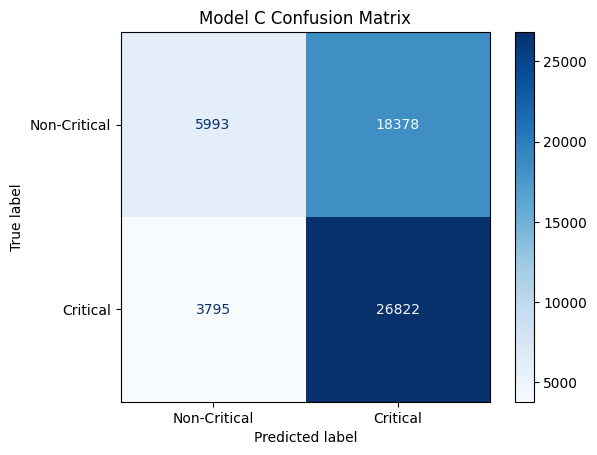

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test_C, y_pred_C)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Critical','Critical'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Model C Confusion Matrix")
plt.show()


### 8) Decide Which Model Is “Better” — Explain Your Metric Choice

- If the **cost of missing a Critical** violation is high → prioritize **Recall** on the positive class.  
- If the **cost of wrongly flagging Critical** is high → prioritize **Precision** on the positive class.  
- If you want a balance → **F1**.

Write 3–5 sentences justifying your pick using the table above (Precision/Recall/F1).


## We Share (Reflection)

1) **Chosen model (A/B/C)** and **why**, referencing **Precision/Recall/F1** for the **Critical (1)** class.  
2) Your **confusion matrix** and a one-liner in plain English:  
   - “Out of all inspections we predicted **Critical**, **X%** were actually Critical (Precision).  
   - Of all actually **Critical** inspections, we caught **Y%** (Recall).”  

I’d go with Model C (SCORE + BORO + Top Cuisines) because it catches the most Critical inspections without making too many false alarms. It has the highest recall (0.88), which is good since missing a Critical violation is a big deal. The precision is also decent (0.59), so most of the ones we flag as Critical are actually Critical. Overall, the F1 score shows it’s the best balance, so it seems like the most reliable choice for this task.